# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


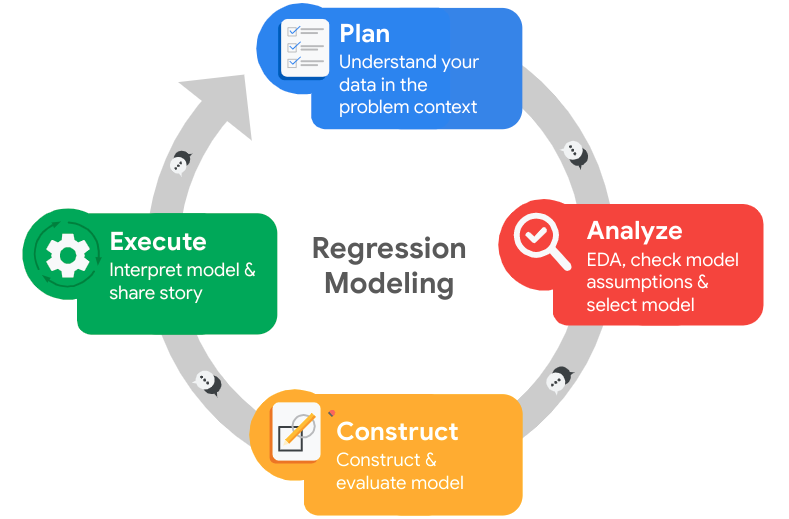

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 14,999 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]   
- The stakeholders are the HR department at Salifort Motors. 
- I identified target variable: `left` and possible features for machine learning model: `satisfaction_level`, `last_evaluation`, `number_project`, ...
- Employee data including `last_evaluation`, `salary`, `promotion_last_5years` is highly sensitive. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
### YOUR CODE HERE ### 

# basic packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# data modeling
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics, helpful packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# saving models
import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={
  'Work_accident': 'work_accident',
  'Department': 'department',
  'time_spend_company': 'tenure',
  'average_montly_hours': 'average_monthly_hours'
})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
# default is keep='first'
df = df0.drop_duplicates(keep='first').reset_index(drop=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

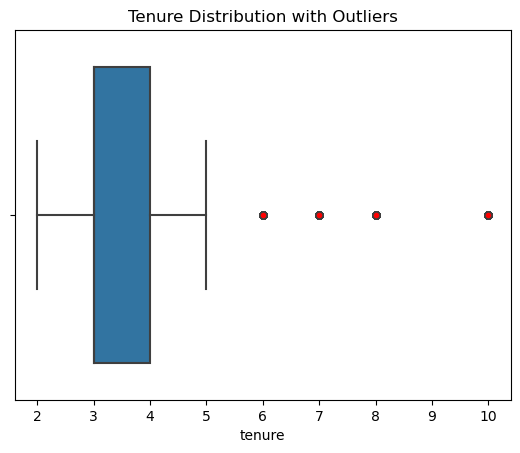

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df, x='tenure', flierprops={
  'marker':'o',
  'markersize':5,
  'markerfacecolor':'red'
})
plt.title('Tenure Distribution with Outliers')
plt.show()

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
print(df.loc[df['tenure'] >= 6].shape[0])
print(df.shape[0])

# outliers are just statistical outliers, not necessarily errors. 
# The outliers take up a small percentage of the data, so not removing them is not a big deal. 

824
11991


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('-'* 50)
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
--------------------------------------------------
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

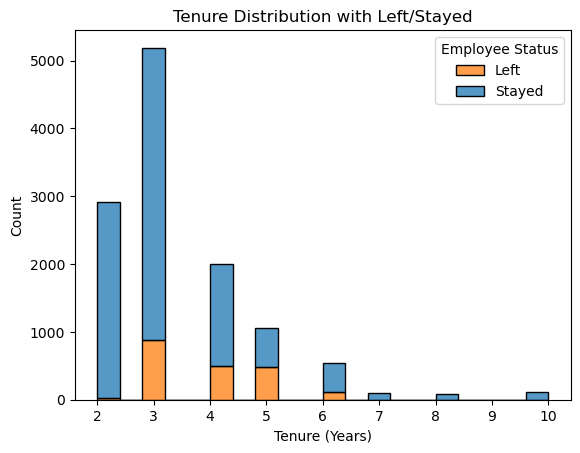

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='tenure', hue='left', multiple='stack', bins=20)
plt.title('Tenure Distribution with Left/Stayed')
plt.xlabel('Tenure (Years)')
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.show()

Most employees who leave the company have tenure of 3 ~ 6 years. 

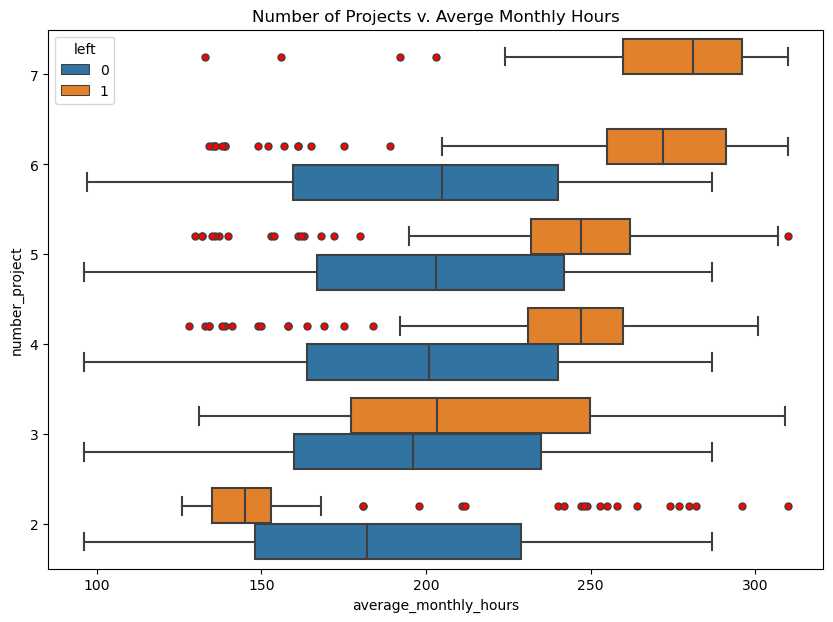

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# number_project v. average_monthly_hours
plt.figure(figsize=(10, 7))

sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient='h', flierprops={
  'marker':'o',
  'markersize':5,
  'markerfacecolor':'red'
  })
plt.gca().invert_yaxis()
plt.title('Number of Projects v. Averge Monthly Hours')
plt.show()

- The higher the `average_monthly_hours`, the higher the employees leave the company. 
- Every employee with 7 projects have left the company. 
- Employees with 6, 7 projects and who left have considerably higher `average_monthly_hours` than others, 250~300 hrs
- Those who worked considerably less than other peers left the company. Maybe they were given less work because they were already on their way out the door. 
- Say a person works 40 hrs a week. Then, The average monthly work hour would be around 160~200 hrs. A lot employees are already overworking.

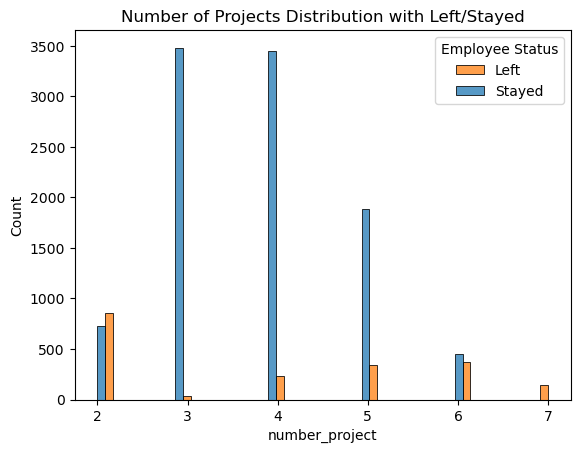

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge')
plt.title('Number of Projects Distribution with Left/Stayed')
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.show()

- The ratio of stayed/left are the lowest across 3~4 projects. It seems these are adequate amount of projects for an employee. 

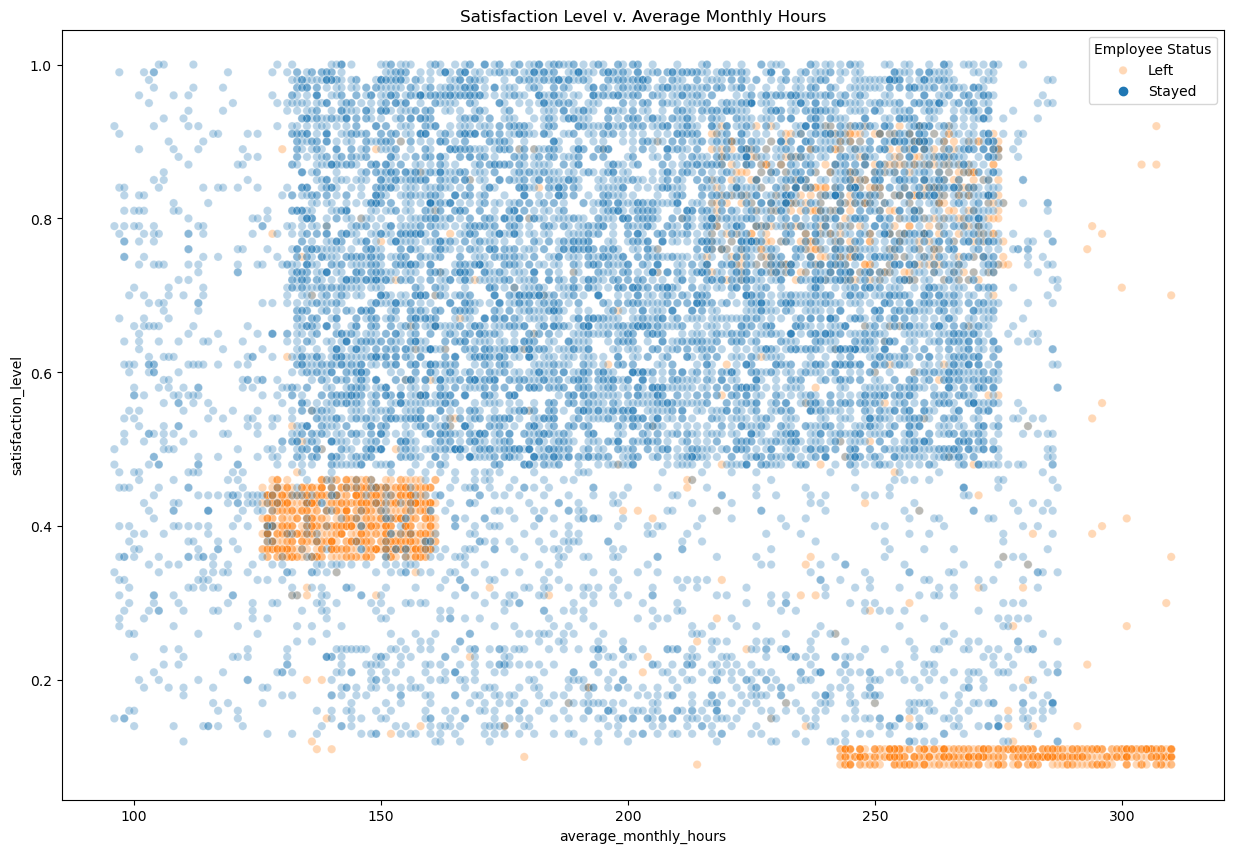

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# satisfaction_level v. average_monthly_hours
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3)
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.title('Satisfaction Level v. Average Monthly Hours')
plt.show()

- Two distinct groups of employees who left. 
- The first group worked around 130~170 hrs, which is moderate. However, their `satisfaction_level` is still 0.4, quite low. It's difficult to deduce why they left. 
- The second group are those who considerably overworked and who showed very low `satisfaction_level`. 
- Many employees worked over 200 hours. 

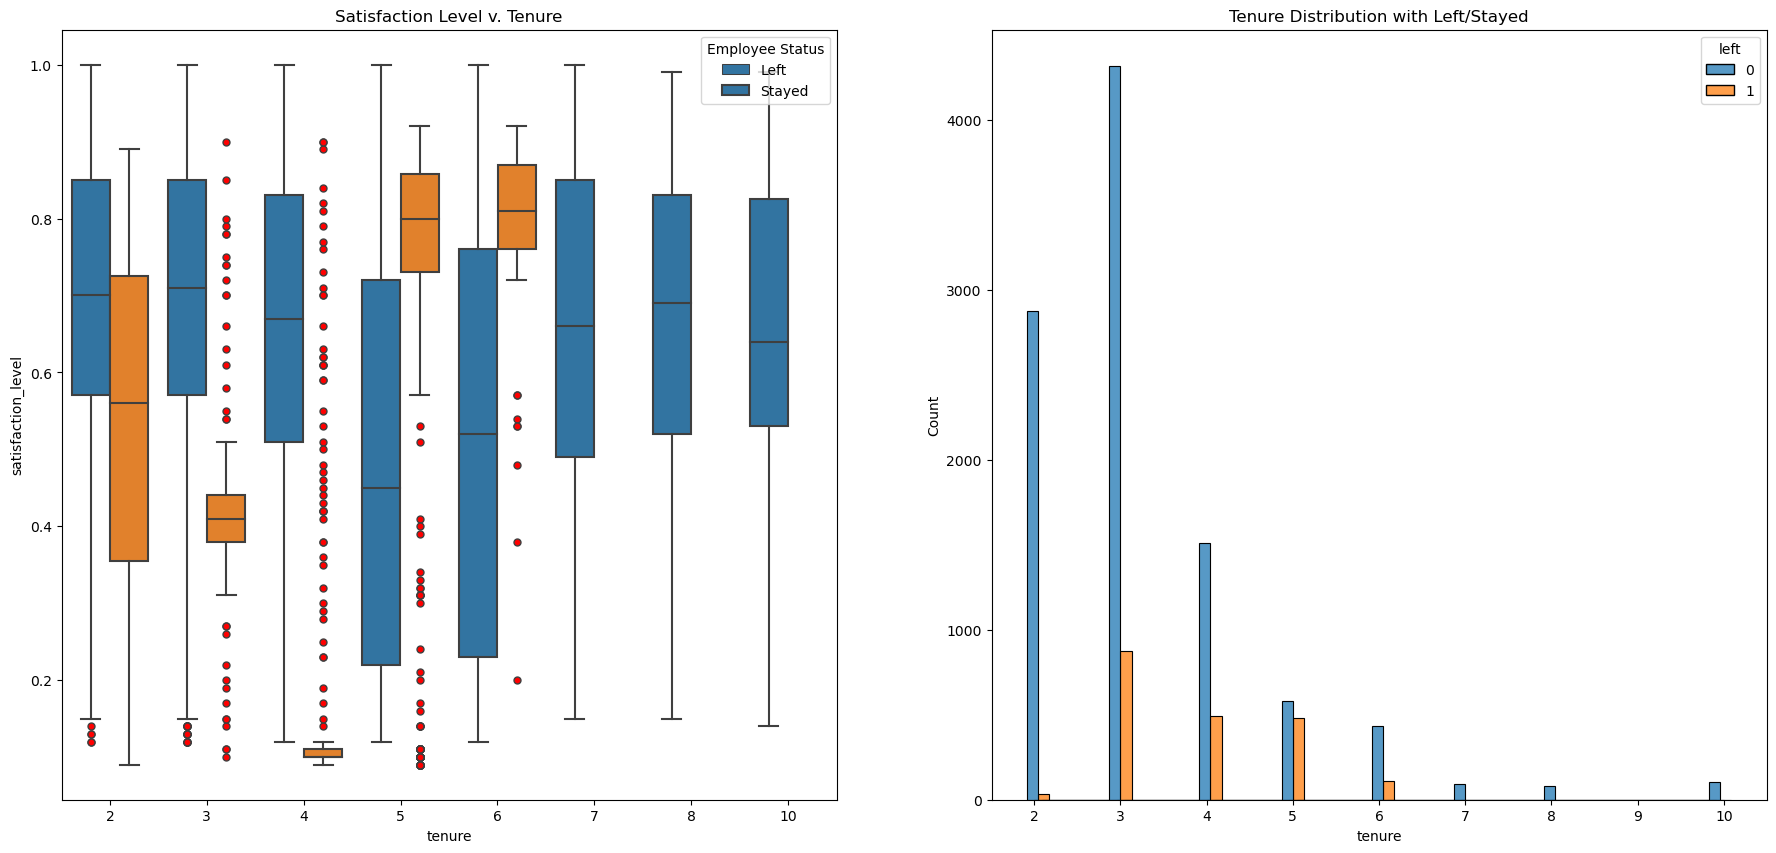

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# satisfaction_level v. tenure

fig, ax = plt.subplots(1, 2, figsize=(22, 10))
sns.boxplot(data=df, x='tenure', y='satisfaction_level', hue='left', flierprops={
  'marker':'o',
  'markerfacecolor':'red'
}, ax=ax[0])
ax[0].legend(title='Employee Status', labels=['Left', 'Stayed'])
ax[0].set_title('Satisfaction Level v. Tenure')

sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Tenure Distribution with Left/Stayed')

plt.show()

- Those who had stayed in the company for more than 6 years did not leave.
- Employees who left with 2-3 years of tenure tend to have relatively low `satisfaction_level`. 
- Employees who left with 4 years of tenure have considerably low `satisfaction_level`, which needs investigation as to what had happened. 
- Employees who stayed with 5-6 years of tenure have significantly low score of `satisfaction_level`. 

In [21]:
df.groupby('left')['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Those who left shows lower mean and median of satisfaction level. 

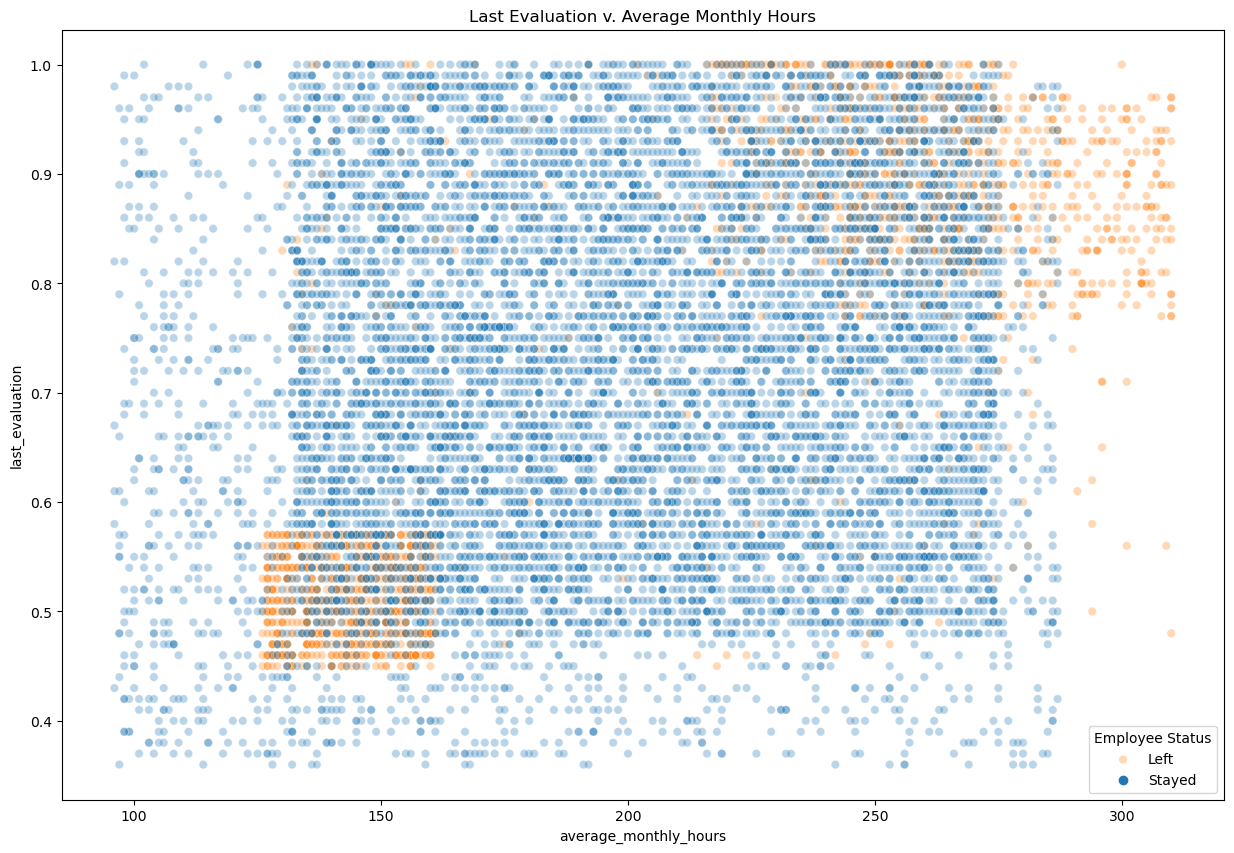

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# last_evaluation v. average_monthly_hours
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3)
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.title('Last Evaluation v. Average Monthly Hours')
plt.show()

- Again, there are two distinct groups of employees who left.
- The first group has relatively low monthly working hours and low evaluation score.
- The other group shows considerably high working hours and high evaluation score. 
- It seems like `average_monthly_hours` and `last_evaluation` are positively correlated. 

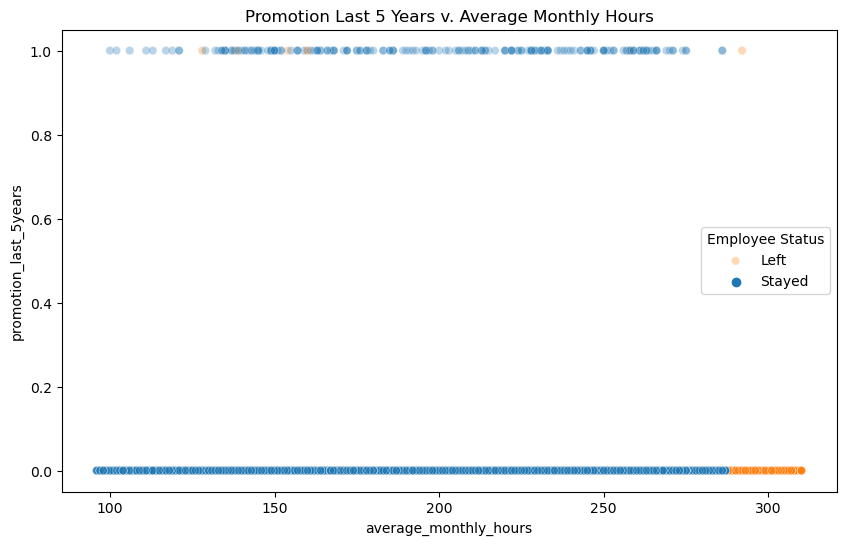

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
# promoted v. average_monthly_hours
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.3)
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.title('Promotion Last 5 Years v. Average Monthly Hours')
plt.show()

- Most of the employees who left overworked but was not promoted in the last 5 years. It makes sense why they left.

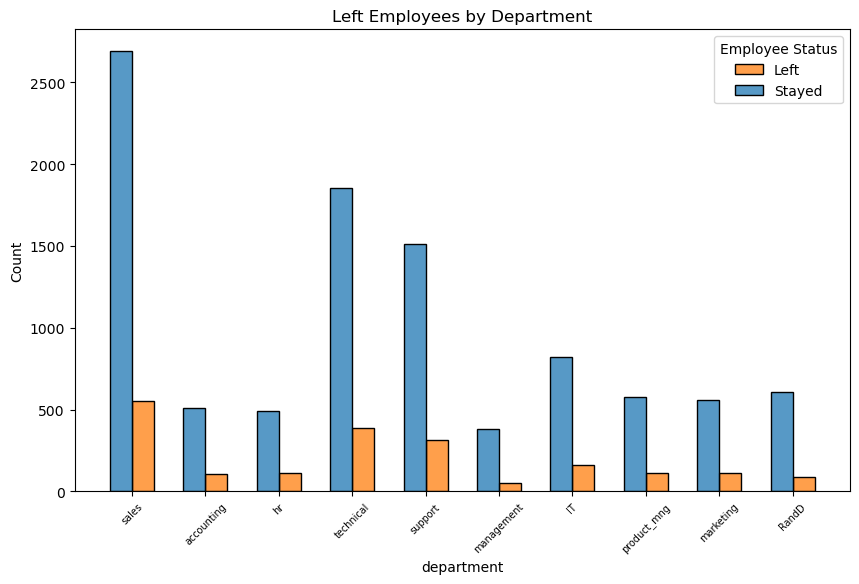

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
# Left employees by department
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='department', hue='left', multiple='dodge', shrink=0.6)
plt.xticks(rotation=45, fontsize=7)
plt.legend(title='Employee Status', labels=['Left', 'Stayed'])
plt.title('Left Employees by Department')
plt.show()

- Nothing significant differences among the departments.

C:\Users\mrkoh\AppData\Local\Temp\ipykernel_39904\2125492428.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

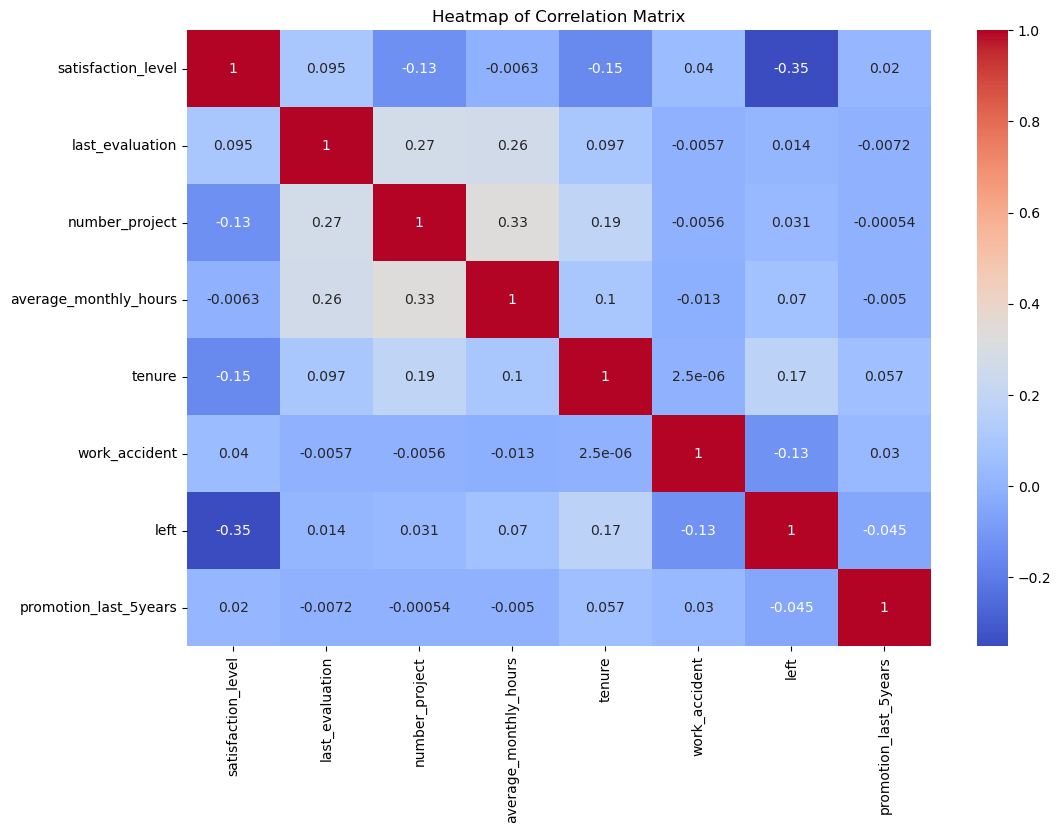

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')

- The heatmap confirms the positive correlation between `left` and number of projects, monthly working hours, and evaluation score. 
- `left` is negatively correlated with `satisfaction_level`.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]      


Leaving is tied with overworking, excessive number of projects, and low satisfaction levels. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]   
I need to predict whether an employee leaves the company (categorical target variable). Therefore, it is a binary classification task. 

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]    
Logistic Regression model or Tree-based machine learning model (DecisionTree, RandomForest, XGBoost, ...)

### Modeling

Add as many cells as you need to conduct the modeling process.

In [26]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [27]:
# ordinal encoding for salary (because it is ordinal)
df_encoded = df.copy()

df_encoded['salary'] = (df_encoded['salary'].astype('category')
                        .cat.set_categories(['low', 'medium', 'high'], ordered=True)
                        .cat.codes)
# one hot encoding for department
df_encoded = pd.get_dummies(df_encoded, columns=['department'])

df_encoded.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


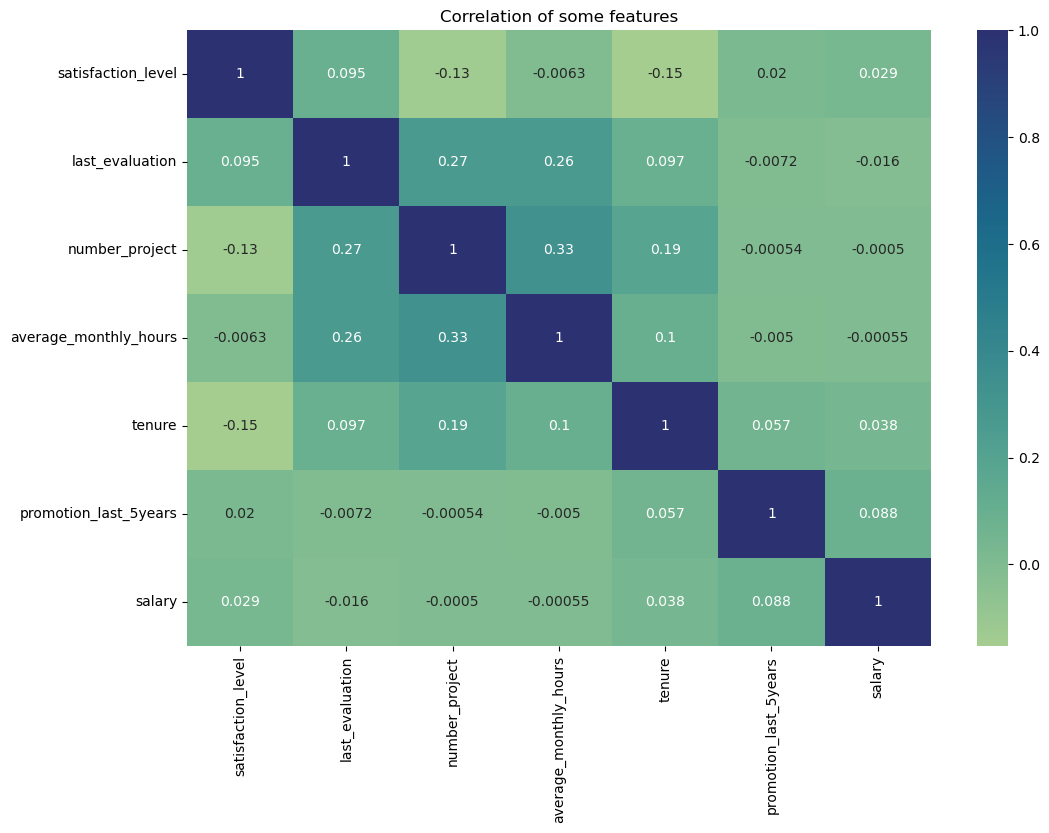

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'promotion_last_5years', 'salary']].corr(),
            annot=True, cmap='crest')
plt.title('Correlation of some features')
plt.show()

#### Decision Tree
Tree-based models are robust to outliers. Thus, outliers in `tenure` can be kept.

In [29]:
y = df_encoded['left']
X = df_encoded.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=99)

In [30]:
# DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=99)

dt_cv_params = {
  'max_depth': [None, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'min_samples_split': [2, 5, 10],
  'max_features': [None, 'sqrt']
}

scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
dt_cv = GridSearchCV(dt, dt_cv_params, scoring=scoring, refit='roc_auc', cv=5, n_jobs=-1, verbose=1)

dt_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'],
             verbose=1)

In [31]:
# display the best parameters found. 
dt_cv.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [32]:
# best auc score on CV
dt_cv.best_score_

0.9739231562329316

In [33]:
dt_cv.cv_results_

{'mean_fit_time': array([0.02221842, 0.02940655, 0.0305078 , 0.04199996, 0.03790455,
        0.03050337, 0.02140069, 0.02260251, 0.02180862, 0.00900741,
        0.01000156, 0.00900087, 0.00939918, 0.00880032, 0.00879931,
        0.00800018, 0.00779977, 0.00739989, 0.00900211, 0.00900354,
        0.0103137 , 0.00841064, 0.00939837, 0.00859962, 0.0100008 ,
        0.01060047, 0.01020002, 0.00579977, 0.00519996, 0.00459981,
        0.0052001 , 0.00520091, 0.00520024, 0.00539932, 0.00460138,
        0.00440125, 0.01900134, 0.0187037 , 0.01780081, 0.0181025 ,
        0.01990986, 0.0190033 , 0.01930623, 0.01910191, 0.02019801,
        0.00740085, 0.00739985, 0.00660067, 0.00720048, 0.00660009,
        0.0063993 , 0.00720053, 0.00580597, 0.00670042]),
 'std_fit_time': array([0.00284364, 0.00384378, 0.00487058, 0.01375506, 0.01369526,
        0.0068705 , 0.00049008, 0.00326343, 0.00132827, 0.00044869,
        0.00154868, 0.00063286, 0.00102072, 0.00132717, 0.00074979,
        0.00109497, 0.001

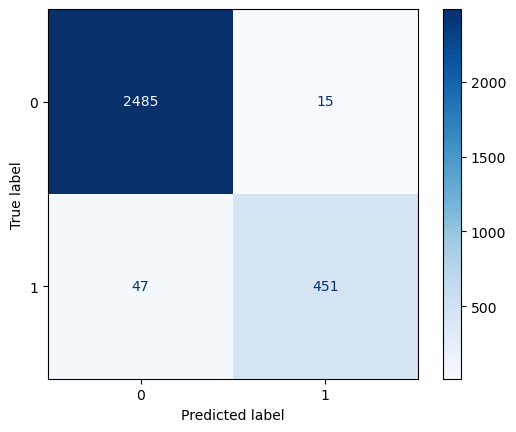

In [34]:
# confusion matrix
dt_y_pred = dt_cv.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_cm_display = ConfusionMatrixDisplay(dt_cm, display_labels=dt_cv.classes_)
dt_cm_display.plot(cmap='Blues')

In [35]:
def make_results(model_name:str, model_object, metric:str):
  metric_dict = {
    'auc': 'mean_test_roc_auc',
    'accuracy': 'mean_test_accuracy',
    'recall': 'mean_test_recall', 
    'precision': 'mean_test_precision', 
    'f1': 'mean_test_f1'
  }
  
  cv_results = pd.DataFrame(model_object.cv_results_)
  # best estimator result in the specified metric
  best_estimator_results = cv_results.loc[cv_results[metric_dict[metric]].idxmax(), :]
  
  auc = best_estimator_results['mean_test_roc_auc']
  accuracy = best_estimator_results['mean_test_accuracy']   
  recall = best_estimator_results['mean_test_recall']
  precision = best_estimator_results['mean_test_precision']
  f1 = best_estimator_results['mean_test_f1']
  
  # create table
  table = pd.DataFrame({
    'model': [model_name],
    'auc': [auc],
    'accuracy': [accuracy],
    'recall': [recall],   
    'precision': [precision],
    'f1': [f1]
  })
  
  return table

In [68]:
dt_cv_results = make_results('Decision Tree CV', dt_cv, 'auc')
dt_cv_results

,model,auc,accuracy,recall,precision,f1
0,Decision Tree CV,0.973923,0.97865,0.921622,0.948527,0.93472


The model shows strong performance.   
Since ensemble models are more resistant to overfitting, let's try random forest and xgboost as well. 

#### Random Forest

In [37]:
rf = RandomForestClassifier(random_state=99)

rf_cv_params = {
  'n_estimators': [50, 100, 200, 500],
  'max_depth': [None, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'min_samples_split': [2, 5, 7, 10],
  'max_features': [None, 'sqrt', 'log2'],
}

rf_cv = GridSearchCV(rf, rf_cv_params, scoring=scoring, refit='roc_auc', cv=5, n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'],
             verbose=1)

In [38]:
# display the best parameters found
rf_cv.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [39]:
# best auc score on CV
rf_cv.best_score_

0.9815248681286615

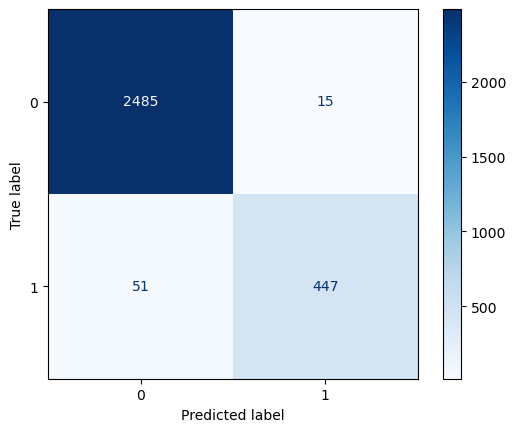

In [40]:
# confusion matrix
rf_y_pred = rf_cv.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_display = ConfusionMatrixDisplay(rf_cm, display_labels=rf_cv.classes_)
rf_cm_display.plot(cmap='Blues')

In [69]:
# make results
rf_cv_results = make_results('Random Forest CV', rf_cv, 'auc')
all_results = pd.concat([dt_cv_results, rf_cv_results], ignore_index=True)
all_results

,model,auc,accuracy,recall,precision,f1
0,Decision Tree CV,0.973923,0.978650,0.921622,0.948527,0.934720
1,Random Forest CV,0.981525,0.978094,0.910898,0.955231,0.932353


Overall, the random forest performed similarly to the decision tree, with slight increase in auc score, but lower in recall score. 

#### XGBoost

In [42]:
%%time

xgb = XGBClassifier(random_state=99, objective='binary:logistic')

xgb_cv_params = {
  'n_estimators': [50, 100, 200, 500],
  'max_depth': [None, 5, 10],
  'min_child_weight': [1, 2, 5, 10],
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'max_features': [None, 'sqrt', 'log2'],
  'subsample': [0.8, 0.9, 1.0], # to prevent overfitting
  'colsample_bytree': [.8, .9, 1.0]
}

xgb_cv = GridSearchCV(xgb, xgb_cv_params, scoring=scoring, refit='roc_auc', cv=5, n_jobs=-1, verbose=1)
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
CPU times: total: 56.7 s
Wall time: 4min 40s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_child_weight': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 200, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'],
             verbose=1)

In [43]:
# best parameters found
xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'max_features': None,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 1.0}

In [44]:
xgb_cv.best_score_

0.9871900309009151

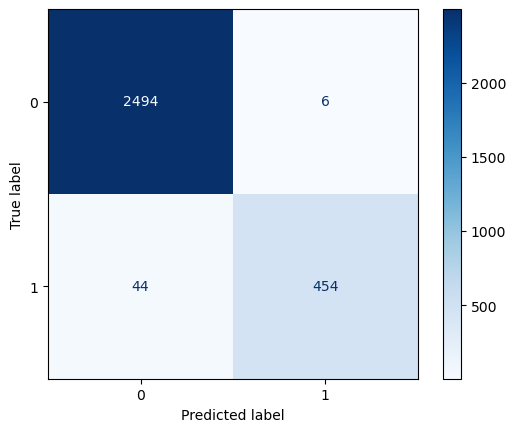

In [45]:
# confusion matrix
xgb_y_pred = xgb_cv.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_cm_display = ConfusionMatrixDisplay(xgb_cm, display_labels=xgb_cv.classes_)
xgb_cm_display.plot(cmap='Blues')

In [70]:
xgb_cv_results = make_results('XGBoost CV', xgb_cv, 'auc')
all_results = pd.concat([all_results, xgb_cv_results], ignore_index=True)
all_results

,model,auc,accuracy,recall,precision,f1
0,Decision Tree CV,0.973923,0.978650,0.921622,0.948527,0.934720
1,Random Forest CV,0.981525,0.978094,0.910898,0.955231,0.932353
2,XGBoost CV,0.987190,0.983320,0.921622,0.976718,0.948235


Of all three, XGBoost model has the best performance. 

#### Logistic Regression

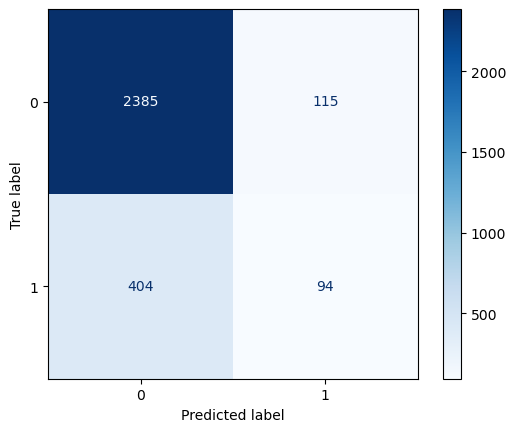

In [47]:
log_clf = LogisticRegression(max_iter=1000, random_state=99)
log_clf.fit(X_train, y_train)

log_y_pred = log_clf.predict(X_test)

# confusion matrix
log_cm = confusion_matrix(y_test, log_y_pred)
log_cm_display = ConfusionMatrixDisplay(log_cm, display_labels=log_clf.classes_)
log_cm_display.plot(cmap='Blues')

In [49]:
# classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
classification_report_df = pd.DataFrame(classification_report(y_test, log_y_pred, target_names=target_names, output_dict=True)).T
classification_report_df

,precision,recall,f1-score,support
Predicted would not leave,0.855145,0.954000,0.901872,2500.000000
Predicted would leave,0.449761,0.188755,0.265912,498.000000
accuracy,0.826885,0.826885,0.826885,0.826885
macro avg,0.652453,0.571378,0.583892,2998.000000
weighted avg,0.787807,0.826885,0.796232,2998.000000


The classification report above shows that the logistic regression model did precision of 79%, recall of 82.6%, and f1-score of 79.6%.   
It under-performed than other tree-based models shown above. 

In [50]:
# save model object
def write_pickle(path, model_object, filename:str):
  '''
  Save a model object as a file.
  '''
  with open(path + filename + '.pickle', 'wb') as to_write:
    pickle.dump(model_object, to_write)
    
 
# read model object
def read_pickle(path, saved_model_name:str):
  '''
  Read a model object from a file.
  '''
  with open(path + saved_model_name + '.pickle', 'rb') as to_read:
    model = pickle.load(to_read)
  return model
  

#### Feature Engineering

The performance of tree-based models are exceptionally high. This may be due to __data leakage__ - maybe `average_monthly_hours` column is a source of data leakage. If employees had already decided to quit, they may be working fewer hours. `satisfaction_level` could be dropped - it's likely that the company won't have satisfaction levels reported for all employees.
<br></br>
Introduce `overworked` binary variable. If `average_monthly_hours` > 175 hours, `overworked` = 1. Otherwise, `overworked` = 0. 

In [52]:
df_eng = df_encoded.copy()
df_eng = df_eng.drop(columns=['satisfaction_level'], axis=1)
df_eng['overworked'] = np.where(df_eng['average_monthly_hours'] > 175, 1, 0)
df_eng = df_eng.drop(columns=['average_monthly_hours'], axis=1)
df_eng.head(10)

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.77,6,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7,0.85,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,1.00,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
# create target variable and features
y = df_eng['left']
X = df_eng.drop('left', axis=1)

In [55]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=99)

In [62]:
# Decision Tree
# DecisionTreeClassifier 
dt_eng = DecisionTreeClassifier(random_state=99)

dt_eng_cv_params = {
  'max_depth': [None, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'min_samples_split': [2, 5, 10],
  'max_features': [None, 'sqrt']
}

scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
dt_eng_cv = GridSearchCV(dt_eng, dt_eng_cv_params, scoring=scoring, refit='roc_auc', cv=5, n_jobs=-1, verbose=1)

dt_eng_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'],
             verbose=1)

In [63]:
# display the best parameters found.
print(dt_eng_cv.best_params_)

print('-'*50)
# best auc score on CV
dt_eng_cv.best_score_

{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
--------------------------------------------------


0.9576489977778276

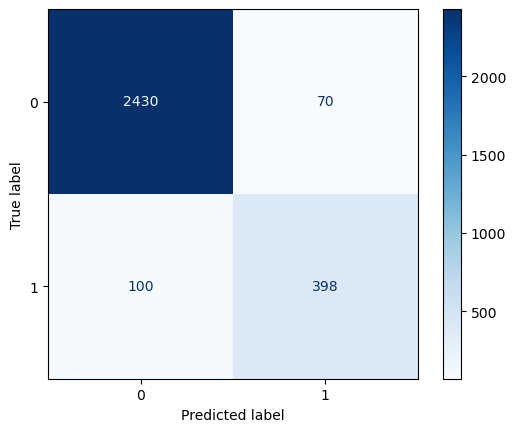

In [64]:
dt_eng_y_pred = dt_eng_cv.predict(X_test)
dt_eng_cm = confusion_matrix(y_test, dt_eng_y_pred)
dt_eng_cm_display = ConfusionMatrixDisplay(dt_eng_cm, display_labels=dt_eng_cv.classes_)
dt_eng_cm_display.plot(cmap='Blues')

In [71]:
dt_eng_cv_results = make_results('Decision Tree CV (after)', dt_eng_cv, 'auc')
all_results = pd.concat([all_results, dt_eng_cv_results], ignore_index=True)
all_results

,model,auc,accuracy,recall,precision,f1
0,Decision Tree CV,0.973923,0.978650,0.921622,0.948527,0.934720
1,Random Forest CV,0.981525,0.978094,0.910898,0.955231,0.932353
2,XGBoost CV,0.987190,0.983320,0.921622,0.976718,0.948235
3,Decision Tree CV (after),0.957649,0.945068,0.845963,0.827723,0.836365


In [72]:
# Random Forest 
rf2 = RandomForestClassifier(random_state=99)

rf2_cv_params = {
  'n_estimators': [50, 100, 200, 500],
  'max_depth': [None, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'min_samples_split': [2, 5, 7, 10],
  'max_features': [None, 'sqrt', 'log2'],
}

rf2_cv = GridSearchCV(rf2, rf2_cv_params, scoring=scoring, refit='roc_auc', cv=5, n_jobs=-1, verbose=1)
rf2_cv.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'],
             verbose=1)

In [73]:
# display the best parameters found
print(rf2_cv.best_params_)

print('-'*50)

# best auc score on CV
rf2_cv.best_score_

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100}
--------------------------------------------------


0.9689171361660419

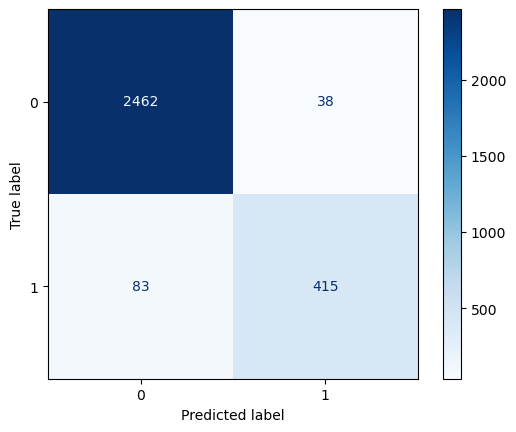

In [74]:
# confusion matrix
rf2_y_pred = rf2_cv.predict(X_test)
rf2_cm = confusion_matrix(y_test, rf2_y_pred)
rf2_cm_display = ConfusionMatrixDisplay(rf2_cm, display_labels=rf2_cv.classes_)
rf2_cm_display.plot(cmap='Blues')

In [75]:
# make results
rf2_cv_results = make_results('Random Forest CV (after)', rf2_cv, 'auc')
all_results = pd.concat([all_results, rf2_cv_results], ignore_index=True)
all_results

,model,auc,accuracy,recall,precision,f1
0,Decision Tree CV,0.973923,0.978650,0.921622,0.948527,0.934720
1,Random Forest CV,0.981525,0.978094,0.910898,0.955231,0.932353
2,XGBoost CV,0.987190,0.983320,0.921622,0.976718,0.948235
3,Decision Tree CV (after),0.957649,0.945068,0.845963,0.827723,0.836365
4,Random Forest CV (after),0.968917,0.966084,0.876075,0.915983,0.895516


In [77]:
%%time
# XGBoost

xgb2 = XGBClassifier(random_state=99, objective='binary:logistic')

xgb2_cv_params = {
  'n_estimators': [50, 100, 200, 500],
  'max_depth': [None, 5, 10],
  'min_child_weight': [1, 2, 5, 10],
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'max_features': [None, 'sqrt', 'log2'],
  'subsample': [0.8, 0.9, 1.0], # to prevent overfitting
  'colsample_bytree': [.8, .9, 1.0]
}

xgb2_cv = GridSearchCV(xgb2, xgb2_cv_params, scoring=scoring, refit='roc_auc', cv=5, n_jobs=-1, verbose=1)
xgb2_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
CPU times: total: 53.4 s
Wall time: 4min 31s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_child_weight': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 200, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='roc_auc',
             scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'],
             verbose=1)

In [78]:
# best parameters found
print(xgb2_cv.best_params_)

print('-'*50)

# print the best auc score on CV
print(xgb2_cv.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1.0}
--------------------------------------------------
0.9741849445953326


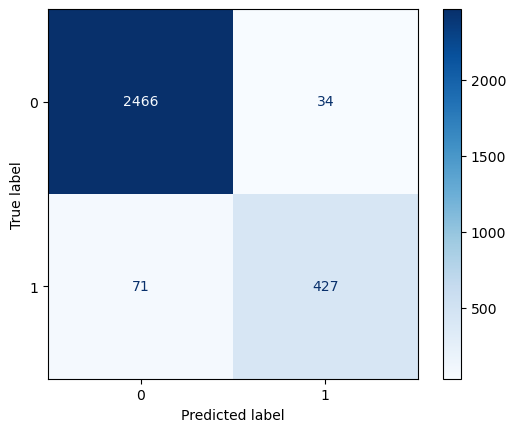

In [79]:
# confusion matrix
xgb2_y_pred = xgb2_cv.predict(X_test)
xgb2_cm = confusion_matrix(y_test, xgb2_y_pred)
xgb2_cm_display = ConfusionMatrixDisplay(xgb2_cm, display_labels=xgb2_cv.classes_)
xgb2_cm_display.plot(cmap='Blues')

In [80]:
xgb2_cv_results = make_results('XGBoost CV (after)', xgb2_cv, 'auc')
all_results = pd.concat([all_results, xgb2_cv_results], ignore_index=True)
all_results

,model,auc,accuracy,recall,precision,f1
0,Decision Tree CV,0.973923,0.978650,0.921622,0.948527,0.934720
1,Random Forest CV,0.981525,0.978094,0.910898,0.955231,0.932353
2,XGBoost CV,0.987190,0.983320,0.921622,0.976718,0.948235
3,Decision Tree CV (after),0.957649,0.945068,0.845963,0.827723,0.836365
4,Random Forest CV (after),0.968917,0.966084,0.876075,0.915983,0.895516
5,XGBoost CV (after),0.974185,0.966195,0.891473,0.903660,0.897364


After feature engineering, there are more False Positives and False Negatives - resulting in lower recall and precision scores. 

<Axes: title={'center': 'Feature Importance of XGBoost Model (after)'}, xlabel='Importance score', ylabel='Features'>

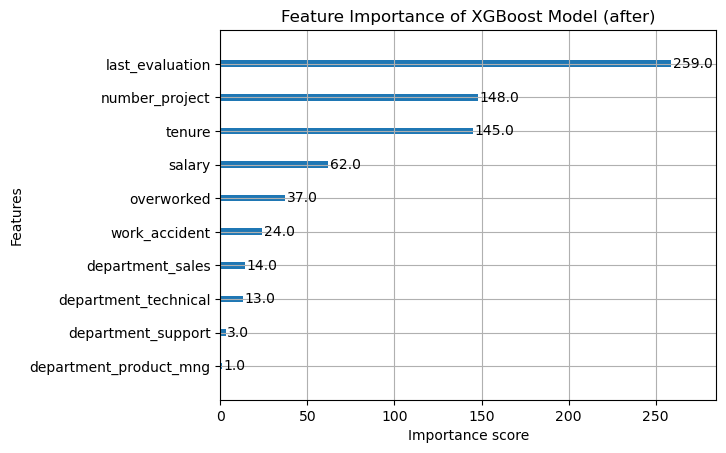

In [81]:
# feature importance
plot_importance(xgb2_cv.best_estimator_, title='Feature Importance of XGBoost Model (after)')

The barplot shows `last_evaluation`, `number_project`, and `tenure` have the highest importance. These variables were the most helpful in predicting `left`. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.   
- Business recommendations: 
  - __Manage workload__: implement a system to monitor the number of projects per employee. 3~4 seems to be a healthy range. 
  - __Rethink Performance Reviews__: Since both high and low in `last_evaluation` is linked to leaving the company, the review process should be analyzed. 
  - __Retention Program__: HR department should implement such retention program, as 3~6 year tenure mark is a critical attrition window. 
  - __Promote Work-Life Balance__: A lot of employees are overworking. The company should enforce policies to prevent burnouts.

- Model improvements
  - __More Granular Data__: Merging data on compensation or commute times could add more predictive power and insights.
  - __Tracking Data__: Data from tracking each employee over time could allow more advanced analysis. 

- Resources used
  - scikit-learn, pandas, seaborn, ... documents.
  - Online communities, such as stackoverflow or reddit.

- Ethical considerations
  - __Proper use of data__: The collected data and the model should be used to support employees, not to penalize them. 
  - __Interpretable model__: The model above should be explainable. 


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]  

- __Tree-based ML (after feature engineering)__
  - XGBoost performed the best among other tree-based ML models. It achieved auc score of 97.4%, accuracy of 96.6%, recall score of 89.1%, precision score of 90.3%, and f1 score of 89.7%.

- __Logistic regression model__: Precision of 78.7%, recall of 82.6%, f1 score of 79.6%, and accuracy of 82.6%. 

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]   
- Cap the number of projects
- Promotion of employees who worked with the company for a long time and has good evaluation. 
- Overtime pay policy, policies to prevent overworking.
- Maybe __K-means__ model on this data to analyze clusters --> valuable insight